In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from news_pop.datas import Dataset
from news_pop.evaluation import (m_r_squared, mean_absolute_error,
                                 pMAE, pMSE, r_squared)
from news_pop.evaluation import plt_corr_matrix, plt_distribution
from news_pop.models import RBFModule, RFECV_


from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn import svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge

In [3]:
def Polynomial(X,degree):
    model = PolynomialFeatures(degree)
    update_X = model.fit_transform(X)
    return update_X

In [6]:
##Load Data
data_tr_class = Dataset(feat_dir='NEWS_Training_data.csv',
                      label_dir='NEWS_Training_label.csv')
data_te_class = Dataset(feat_dir='NEWS_Test_data.csv',
                      label_dir='NEWS_Test_label.csv')

#X_tr = data_tr_class.fil_norm_feat
#Y_tr = data_tr_class.fil_lab
feature_label_tr = data_tr_class.feat_lab

X_tr = data_tr_class.feat
Y_tr = np.vstack(data_tr_class.lab)

#X_te = data_te_class.fil_norm_feat
#Y_te = np.vstack(data_te_class.fil_lab)
#feature_label_te = data_te_class.feat_lab

X_te = data_te_class.feat
#X_te = data_te_class.norm_feat
Y_te = np.vstack(data_te_class.lab)
feature_label_te = data_te_class.lab

poly = PolynomialFeatures(1)

The features that have large variance is: 
{'kw_max_min', 'kw_max_max', 'kw_max_avg', 'self_reference_max_shares', 'kw_avg_max', 'kw_min_avg', 'self_reference_min_shares', 'self_reference_avg_sharess', 'kw_avg_avg', 'kw_min_max'}

The features that is one-hot is: 
{'data_channel_is_tech', 'weekday_is_thursday', 'data_channel_is_lifestyle', 'data_channel_is_world', 'weekday_is_tuesday', 'weekday_is_monday', 'is_weekend', 'data_channel_is_entertainment', 'weekday_is_friday', 'weekday_is_saturday', 'data_channel_is_socmed', 'weekday_is_sunday', 'weekday_is_wednesday', 'data_channel_is_bus', 'n_non_stop_words'}
The features that have large variance is: 
{'kw_max_min', 'kw_max_max', 'kw_max_avg', 'self_reference_max_shares', 'kw_avg_max', 'kw_min_avg', 'self_reference_min_shares', 'self_reference_avg_sharess', 'kw_avg_avg', 'kw_min_max'}

The features that is one-hot is: 
{'data_channel_is_tech', 'weekday_is_thursday', 'data_channel_is_lifestyle', 'data_channel_is_world', 'weekday_is_tuesda

# Non-Sandardized Data

Linear Regression

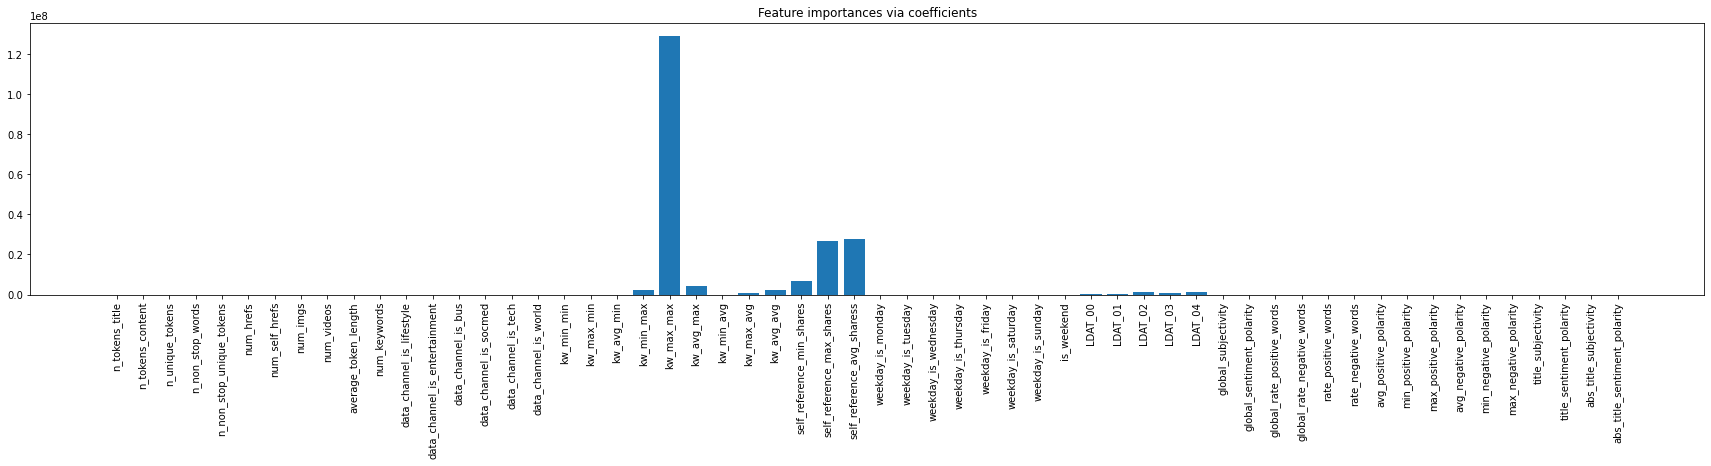

In [9]:
linear_reg = LinearRegression().fit(X_tr, Y_tr)
importance = np.abs(linear_reg.coef_)
plt.bar(height=importance[0], x = feature_label_tr.ravel())
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [10]:
selector = SelectFromModel(estimator=LinearRegression()).fit(X_tr, Y_tr)
print(selector.get_support())

lg_reduced = LinearRegression().fit(selector.transform(X_tr), Y_tr)
Y_te_pred = np.vstack(lg_reduced.predict(selector.transform(X_te)))

[False False False False False False False False False False False False
 False False False False False False False False False  True  True False
 False False  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False]


In [11]:
mae_lg = mean_absolute_error(Y_te_pred, Y_te)
r2_lg = r_squared(Y_te_pred, Y_te)
pmse_lg = pMSE(Y_te_pred, Y_te, r=10)
pmae_lg = pMAE(Y_te_pred, Y_te, r=10)
mr2_lg = m_r_squared(Y_te_pred, Y_te, r=10)

In [12]:
print("The MAE of reduced feature Linear regression is: ", mae_lg)
print("The R^2 of reduced feature Linear regression is: ", r2_lg[0][0])
print("The pMSE of reduced feature Linear regression is: ", pmse_lg[0][0])
print("The pMAE of reduced feature Linear regression is: ", pmae_lg)
print("The mR^2 of reduced feature Linear regression is: ", mr2_lg[0][0])

The MAE of reduced feature Linear regression is:  25145485.349851284
The R^2 of reduced feature Linear regression is:  -15658336.755813917
The pMSE of reduced feature Linear regression is:  803274783.7416587
The pMAE of reduced feature Linear regression is:  19703.249528210246
The mR^2 of reduced feature Linear regression is:  -92243112.10616753


Lasso Regression

C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10798918210.813965, tolerance: 401323279.354897
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28419963213.004395, tolerance: 401323279.354897
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481

C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2808266542.355957, tolerance: 287966712.4659647
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13235946062.809082, tolerance: 287966712.4659647
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26705347534.756348, tolerance: 287966712.4659647
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increa

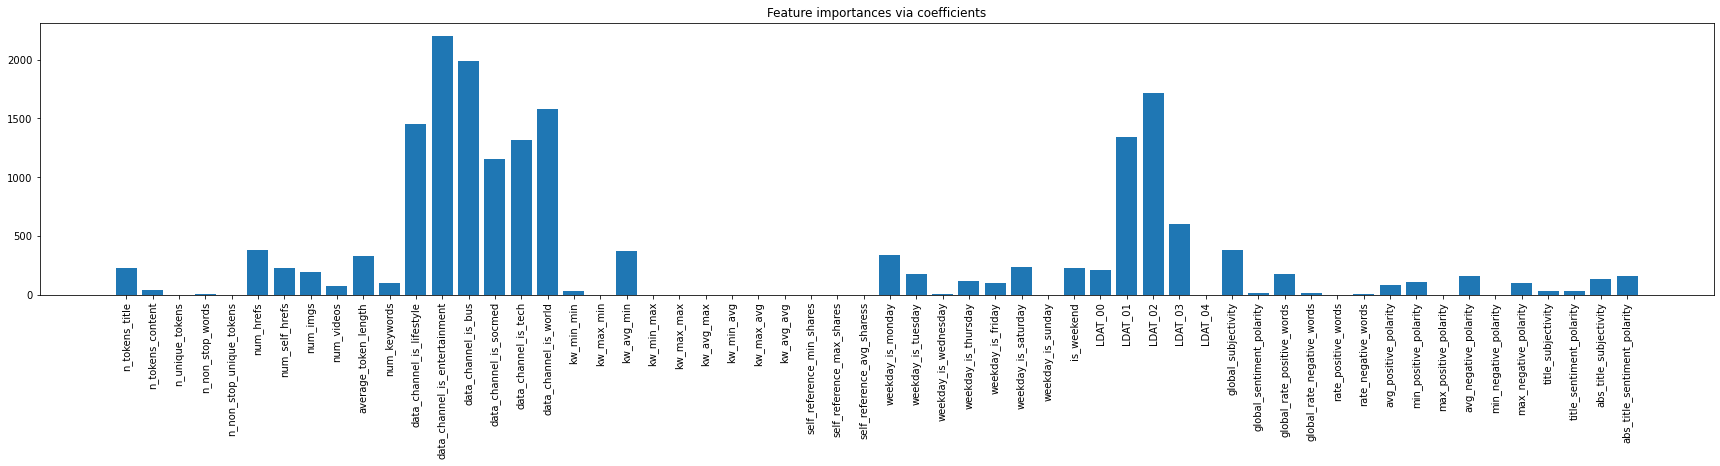

In [13]:
lasso_reg = LassoCV().fit(X_tr, Y_tr)
importance = np.abs(lasso_reg.coef_)
plt.bar(height=importance, x = feature_label_tr.ravel())
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [14]:
selector = SelectFromModel(estimator=LassoCV()).fit(X_tr, Y_tr)
print(selector.get_support())

lasso_reduced = LassoCV().fit(selector.transform(X_tr), Y_tr)
Y_te_pred = np.vstack(lasso_reduced.predict(selector.transform(X_te)))

C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10798918210.813965, tolerance: 401323279.354897
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28419963213.004395, tolerance: 401323279.354897
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481

C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2808266542.355957, tolerance: 287966712.4659647
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13235946062.809082, tolerance: 287966712.4659647
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26705347534.756348, tolerance: 287966712.4659647
  model = cd_fast.enet_coordinate_descent_gram(
C:\abv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increa

[ True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False False False
 False False False False False  True  True  True  True  True  True False
  True  True  True  True  True False  True  True  True  True False  True
  True  True False  True False  True  True  True  True  True]


C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
mae_lasso = mean_absolute_error(Y_te_pred, Y_te)
r2_lasso = r_squared(Y_te_pred, Y_te)
pmse_lasso = pMSE(Y_te_pred, Y_te, r=10)
pmae_lasso = pMAE(Y_te_pred, Y_te, r=10)
mr2_lasso = m_r_squared(Y_te_pred, Y_te, r=10)
print("The MAE of reduced feature Lasso regression is: ", mae_lasso)
print("The R^2 of reduced feature Lasso regression is: ", r2_lasso[0][0])
print("The pMSE of reduced feature Lasso regression is: ", pmse_lasso[0][0])
print("The pMAE of reduced feature Lasso regression is: ", pmae_lasso)
print("The mR^2 of reduced feature Lasso regression is: ", mr2_lasso[0][0])

The MAE of reduced feature Lasso regression is:  2844.9116739473743
The R^2 of reduced feature Lasso regression is:  0.0211017901830427
The pMSE of reduced feature Lasso regression is:  7.43458208485449
The pMAE of reduced feature Lasso regression is:  1.6501505316149996
The mR^2 of reduced feature Lasso regression is:  0.14625852817648488


Ridge Regression

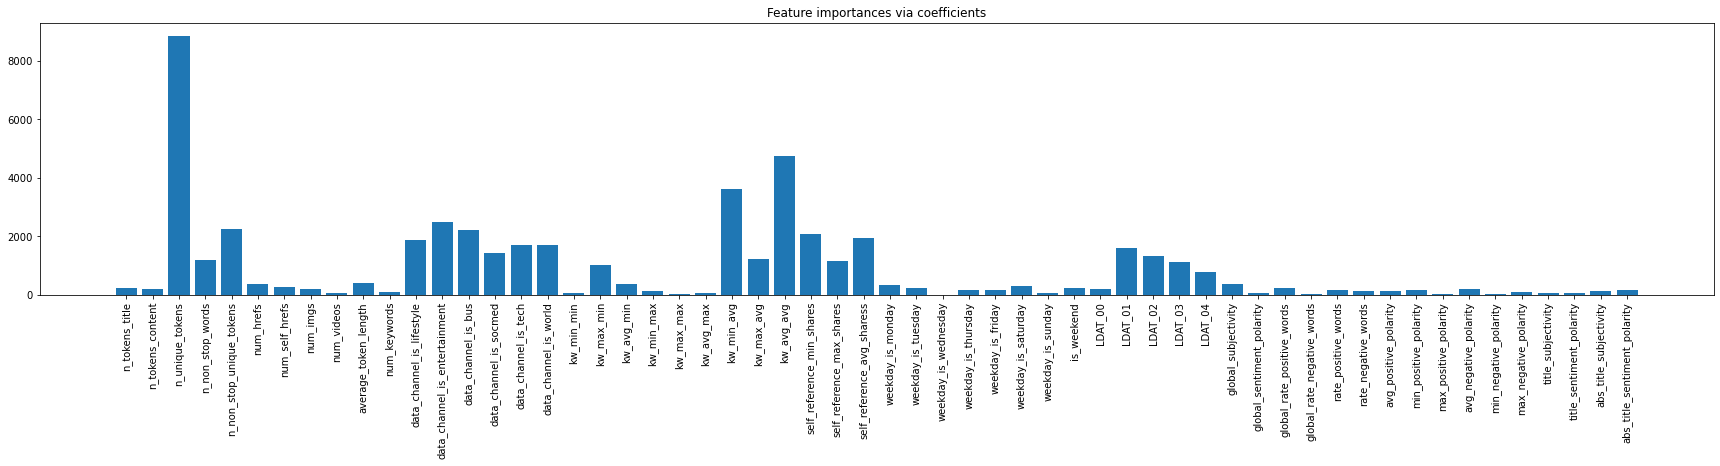

In [17]:
Ridge_reg = Ridge(alpha=1.0).fit(X_tr, Y_tr)
importance = np.abs(Ridge_reg.coef_)
plt.bar(height=importance[0], x = feature_label_tr.ravel())
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [18]:
selector = SelectFromModel(estimator=Ridge(alpha=1.0)).fit(X_tr, Y_tr)
print(selector.get_support())

lasso_reduced = Ridge(alpha=1.0).fit(selector.transform(X_tr), Y_tr)
Y_te_pred = np.vstack(lasso_reduced.predict(selector.transform(X_te)))

[False False  True  True  True False False False False False False  True
  True  True  True  True  True False  True False False False False  True
  True  True  True  True  True False False False False False False False
 False False  True  True  True False False False False False False False
 False False False False False False False False False False]


In [19]:
mae_ridge = mean_absolute_error(Y_te_pred, Y_te)
r2_ridge = r_squared(Y_te_pred, Y_te)
pmse_ridge = pMSE(Y_te_pred, Y_te, r=10)
pmae_ridge = pMAE(Y_te_pred, Y_te, r=10)
mr2_ridge = m_r_squared(Y_te_pred, Y_te, r=10)
print("The MAE of reduced feature Ridge regression is: ", mae_ridge)
print("The R^2 of reduced feature Ridge regression is: ", r2_ridge[0][0])
print("The pMSE of reduced feature Ridge regression is: ", pmse_ridge[0][0])
print("The pMAE of reduced feature Ridge regression is: ", pmae_ridge)
print("The mR^2 of reduced feature Ridge regression is: ", mr2_ridge[0][0])

The MAE of reduced feature Ridge regression is:  5712.771513705974
The R^2 of reduced feature Ridge regression is:  -1.281065835780557
The pMSE of reduced feature Ridge regression is:  40.47971831915859
The pMAE of reduced feature Ridge regression is:  3.510495235035141
The mR^2 of reduced feature Ridge regression is:  -3.6484407465488573


    Selected best alpha of ridge

In [20]:
mae_ridge_set = []; r2_ridge_set = []; pmse_ridge_set = []; pmae_ridge_set = []
mr2_ridge_set = []
c = 0
for j in range(24):
    la = math.exp(j-20)
    selector = SelectFromModel(estimator=Ridge(alpha=la)).fit(X_tr, Y_tr)
    #X_tr_ridge_aug =  Polynomial(selector.transform(X_tr),i+1)
    lasso_reduced = Ridge(alpha=la).fit(selector.transform(X_tr), Y_tr)
    #X_te_ridge_aug = Polynomial(selector.transform(X_te),i+1)
    Y_te_pred = np.vstack(lasso_reduced.predict(selector.transform(X_te)))
    
    mae_ridge = mean_absolute_error(Y_te_pred, Y_te)
    r2_ridge = r_squared(Y_te_pred, Y_te)
    pmse_ridge = pMSE(Y_te_pred, Y_te, r=10)
    pmae_ridge = pMAE(Y_te_pred, Y_te, r=10)
    mr2_ridge = m_r_squared(Y_te_pred, Y_te, r=10)
        
    mae_ridge_set.append(mae_ridge)
    r2_ridge_set.append(r2_ridge)
    pmse_ridge_set.append(pmse_ridge)
    pmae_ridge_set.append(pmae_ridge)
    mr2_ridge_set.append(mr2_ridge)
print(mae_ridge_set)

[24553076.60932447, 23596601.18492171, 21330839.646797907, 16885786.13460299, 10687641.184981907, 7298029.468839682, 4542981.424850599, 2615979.1239922442, 1708023.0030521296, 1236553.8525712872, 970843.9640932023, 858637.0246162465, 678798.0713119541, 560736.4283988232, 409433.9284507051, 247424.84993733434, 121345.55166000327, 47925.05610153125, 19182.156218364536, 4818.719533278653, 5712.771513705974, 5255.355369717468, 5143.743474705081, 4487.136078909516]


We found that When alpha approximate to 20 the ridge have better result

In [22]:
mae_ridge_set = []; r2_ridge_set = []; pmse_ridge_set = []; pmae_ridge_set = []
mr2_ridge_set = []
c = 0
for j in range(20):
    la = 19+0.1*j
    selector = SelectFromModel(estimator=Ridge(alpha=la)).fit(X_tr, Y_tr)
    #X_tr_ridge_aug =  Polynomial(selector.transform(X_tr),i+1)
    lasso_reduced = Ridge(alpha=la).fit(selector.transform(X_tr), Y_tr)
    #X_te_ridge_aug = Polynomial(selector.transform(X_te),i+1)
    Y_te_pred = np.vstack(lasso_reduced.predict(selector.transform(X_te)))
    
    mae_ridge = mean_absolute_error(Y_te_pred, Y_te)
    r2_ridge = r_squared(Y_te_pred, Y_te)
    pmse_ridge = pMSE(Y_te_pred, Y_te, r=10)
    pmae_ridge = pMAE(Y_te_pred, Y_te, r=10)
    mr2_ridge = m_r_squared(Y_te_pred, Y_te, r=10)
        
    mae_ridge_set.append(mae_ridge)
    r2_ridge_set.append(r2_ridge)
    pmse_ridge_set.append(pmse_ridge)
    pmae_ridge_set.append(pmae_ridge)
    mr2_ridge_set.append(mr2_ridge)
print(mae_ridge_set)

[4533.429916425233, 4529.1021768575065, 4524.787896028391, 4520.48664984818, 4516.197546267735, 4511.92054001358, 4507.6564191871885, 4503.405573079605, 4499.167867528625, 4494.942075550353, 4490.7287139160035, 4486.529721117337, 4482.343994859977, 4478.171754618125, 4474.015286139202, 4469.872880904257, 4465.744448902288, 4461.632858508322, 4457.533396726923, 4453.445340829011]


We found that When alpha equal to 21 the ridge have better result

SVR

C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


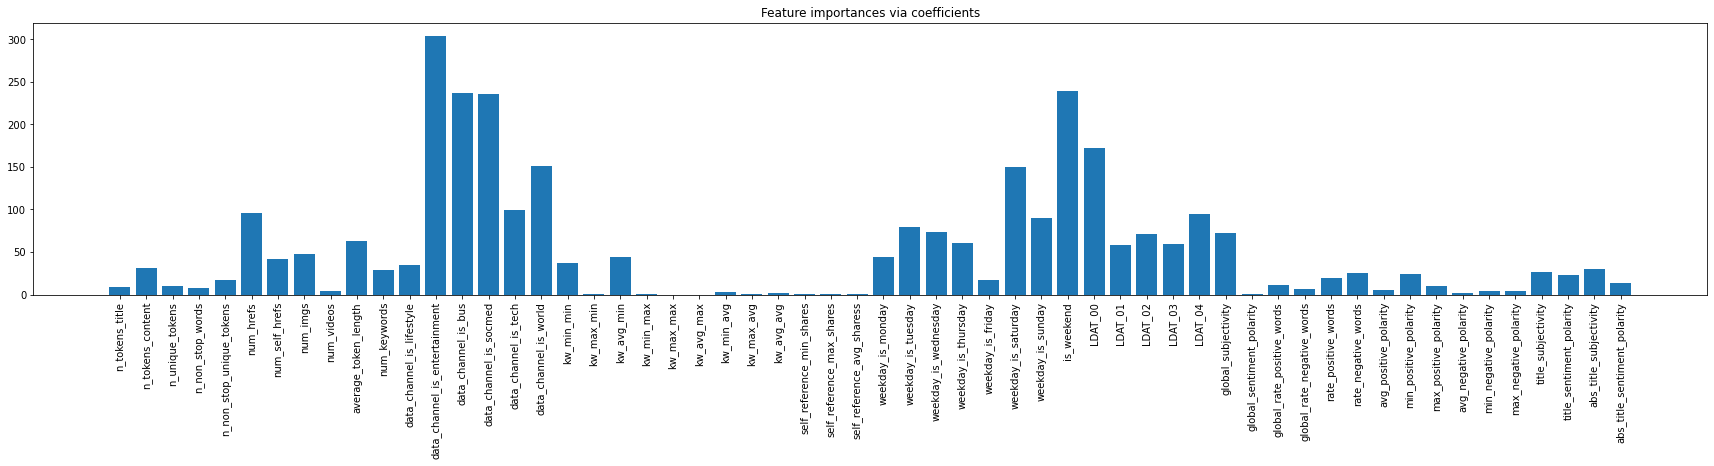

In [23]:
SVR_reg =SVR(kernel="linear").fit(X_tr, Y_tr)
importance = np.abs(SVR_reg.coef_)
plt.bar(height=importance[0], x = feature_label_tr.ravel())
plt.xticks(rotation=90)
plt.title("Feature importances via coefficients")
plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [24]:
selector = SelectFromModel(estimator=SVR(kernel="linear")).fit(X_tr, Y_tr)
print(selector.get_support())

SVR_reduced = SVR(kernel="linear").fit(selector.transform(X_tr), Y_tr)
Y_te_pred = np.vstack(SVR_reduced.predict(selector.transform(X_te)))

C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[False False False False False  True False False False  True False False
  True  True  True  True  True False False False False False False False
 False False False False False False  True  True  True False  True  True
  True  True  True  True  True  True  True False False False False False
 False False False False False False False False False False]


C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
mae_SVR = mean_absolute_error(Y_te_pred, Y_te)
r2_SVR = r_squared(Y_te_pred, Y_te)
pmse_SVR = pMSE(Y_te_pred, Y_te, r=10)
pmae_SVR = pMAE(Y_te_pred, Y_te, r=10)
mr2_SVR = m_r_squared(Y_te_pred, Y_te, r=10)
print("The MAE of reduced feature SVR regression is: ", mae_SVR)
print("The R^2 of reduced feature SVR regression is: ", r2_SVR[0][0])
print("The pMSE of reduced feature SVR regression is: ", pmse_SVR[0][0])
print("The pMAE of reduced feature SVR regression is: ", pmae_SVR)
print("The mR^2 of reduced feature SVR regression is: ", mr2_SVR[0][0])

The MAE of reduced feature SVR regression is:  2132.802511308764
The R^2 of reduced feature SVR regression is:  -0.053110501443773384
The pMSE of reduced feature SVR regression is:  1.1720488823414525
The pMAE of reduced feature SVR regression is:  0.5754694969331288
The mR^2 of reduced feature SVR regression is:  0.8654091478930948


In [26]:
SVR_rbf = SVR(kernel="rbf").fit(X_tr, Y_tr)
Y_te_pred = np.vstack(SVR_rbf.predict(X_te))

mae_SVR = mean_absolute_error(Y_te_pred, Y_te)
r2_SVR = r_squared(Y_te_pred, Y_te)
pmse_SVR = pMSE(Y_te_pred, Y_te, r=10)
pmae_SVR = pMAE(Y_te_pred, Y_te, r=10)
mr2_SVR = m_r_squared(Y_te_pred, Y_te, r=10)
print("The MAE of reduced feature SVR rbf regression is: ", mae_SVR)
print("The R^2 of reduced feature SVR rbf regression is: ", r2_SVR[0][0])
print("The pMSE of reduced feature SVR rbf regression is: ", pmse_SVR[0][0])
print("The pMAE of reduced feature SVR rbf regression is: ", pmae_SVR)
print("The mR^2 of reduced feature SVR rbf regression is: ", mr2_SVR[0][0])

C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The MAE of reduced feature SVR rbf regression is:  2168.750409641885
The R^2 of reduced feature SVR rbf regression is:  -0.0682367832698283
The pMSE of reduced feature SVR rbf regression is:  1.1606179130438419
The pMAE of reduced feature SVR rbf regression is:  0.5903745838140451
The mR^2 of reduced feature SVR rbf regression is:  0.8667218097806261


In [27]:
mae_SVR_set = []; r2_SVR_set = []; pmse_SVR_set = []; pmae_SVR_set = []
mr2_SVR_set = []
C_set = np.logspace(-3,3,10)
for j in range(len(C_set)):
    selector = SelectFromModel(estimator=SVR(kernel="linear", C=C_set[j])).fit(X_tr, Y_tr)
    SVC_reduced = SVR(kernel="linear", C=C_set[j]).fit(selector.transform(X_tr), Y_tr)
    Y_te_pred = np.vstack(SVC_reduced.predict(selector.transform(X_te)))
    
    mae_ridge = mean_absolute_error(Y_te_pred, Y_te)
    r2_ridge = r_squared(Y_te_pred, Y_te)
    pmse_ridge = pMSE(Y_te_pred, Y_te, r=10)
    pmae_ridge = pMAE(Y_te_pred, Y_te, r=10)
    mr2_ridge = m_r_squared(Y_te_pred, Y_te, r=10)
        
    mae_SVR_set.append(mae_ridge)
    r2_SVR_set.append(r2_ridge)
    pmse_SVR_set.append(pmse_ridge)
    pmae_SVR_set.append(pmae_ridge)
    mr2_SVR_set.append(mr2_ridge)


C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\abv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\abv\lib\site-packages\sklearn\uti

In [28]:
print("mae of different C is: ",mae_SVR_set)
print()
print("Corresponding C value: ",C_set)

mae of different C is:  [2191.2886445277, 2182.608465016118, 2165.618537696971, 2147.412457243696, 2135.3502759409425, 2130.3792987929846, 2133.7252257336404, 2513.0126984907906, 3294.563191453711, 3372.3885806664443]

Corresponding C value:  [1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


We found that C = 2.1544 has best result